# AIML MODULE PROJECT - Meghna

## Ensemble Techniques

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

### Data Understanding & Exploration

#### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [2]:
df1 = pd.read_csv('/Users/meghnarana/Downloads/TelcomCustomer-Churn_1.csv')

#### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
df2 = pd.read_csv('/Users/meghnarana/Downloads/TelcomCustomer-Churn_2.csv')

In [4]:
df2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [5]:
merged_df = pd.merge(df1, df2, on='customerID')

In [6]:
merged_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [7]:
# Original dataframe dimensions and columns
print("Original DataFrame 1 Dimensions:", df1.shape)
print("Original DataFrame 1 Columns:", df1.columns.tolist())

print("Original DataFrame 2 Dimensions:", df2.shape)
print("Original DataFrame 2 Columns:", df2.columns.tolist())

# Merged dataframe dimensions and columns
print("Merged DataFrame Dimensions:", merged_df.shape)
print("Merged DataFrame Columns:", merged_df.columns.tolist())

Original DataFrame 1 Dimensions: (7043, 10)
Original DataFrame 1 Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']
Original DataFrame 2 Dimensions: (7043, 12)
Original DataFrame 2 Columns: ['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Merged DataFrame Dimensions: (7043, 21)
Merged DataFrame Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


The merged dataframe now has a total of 21 columns, including all the columns from both original dataframes. The number of rows remains the same at 7043. The merge operation effectively combines the columns from both original dataframes into a single dataframe with all the information.

### Data Cleaning & Analysis

#### A. Impute missing/unexpected values in the DataFrame.

In [8]:
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f'Column: {column}, Unique Values: {unique_values}')

Column: customerID, Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender, Unique Values: ['Female' 'Male']
Column: SeniorCitizen, Unique Values: [0 1]
Column: Partner, Unique Values: ['Yes' 'No']
Column: Dependents, Unique Values: ['No' 'Yes']
Column: tenure, Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService, Unique Values: ['No' 'Yes']
Column: MultipleLines, Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService, Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity, Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup, Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection, Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport, Unique Va

In [9]:
merged_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### B. Make sure all the variables with continuous values are of ‘Float’ type.

In [10]:
columns_to_convert = ["TotalCharges", "MonthlyCharges", "tenure"]

In [11]:
merged_df[columns_to_convert] = merged_df[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype(float)

In [12]:
merged_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# Drop rows with missing values
merged_df.dropna(inplace=True)

#### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [14]:
def create_pie_charts(dataframe):
    # Filter only categorical columns with 'object' data type
    categorical_columns = dataframe.select_dtypes(include=['object'])

    for column_name in categorical_columns:
        # Calculate value counts for the specified column
        value_counts = dataframe[column_name].value_counts()
        labels = value_counts.index
        sizes = value_counts.values

        # Create a pie chart
        plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'{column_name} Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # Show the pie chart
        plt.show()

In [15]:
merged_df.drop('customerID', axis=1, inplace=True)

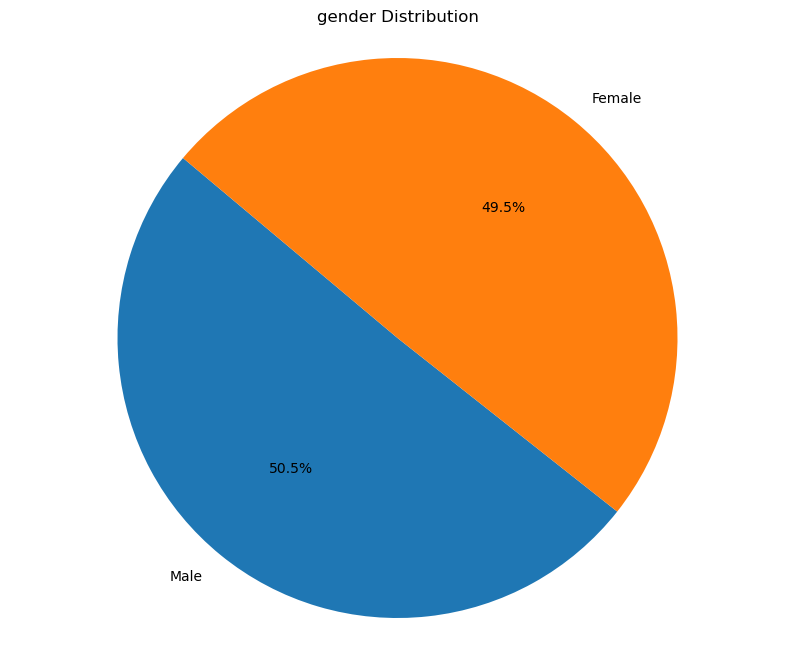

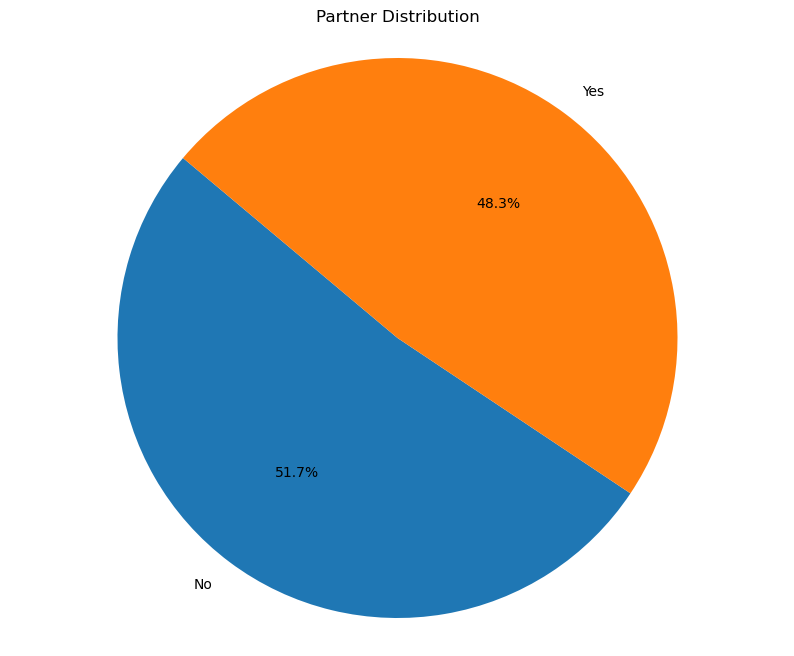

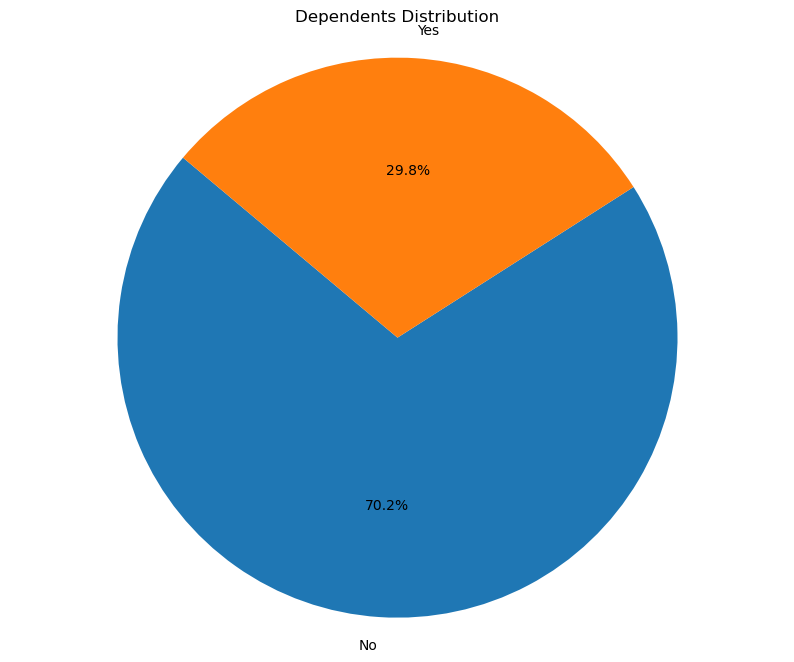

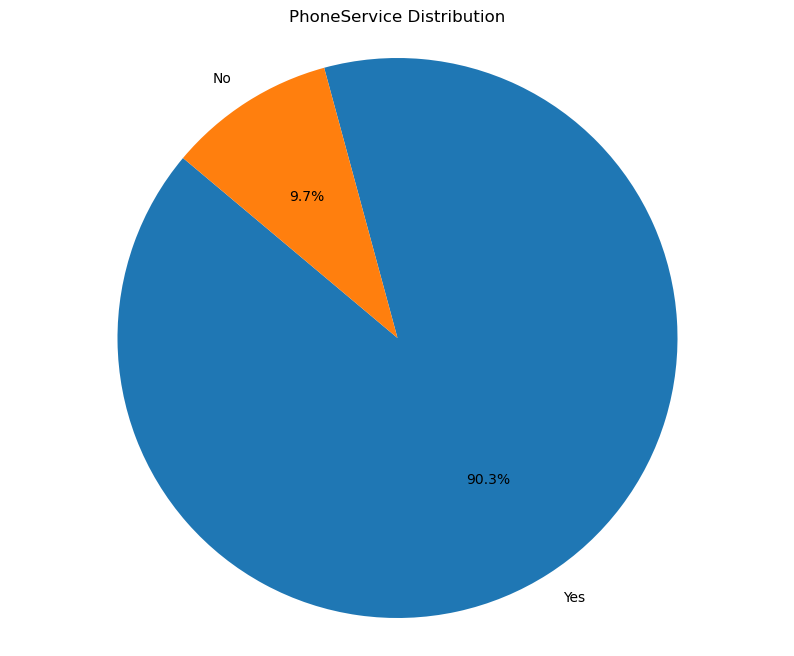

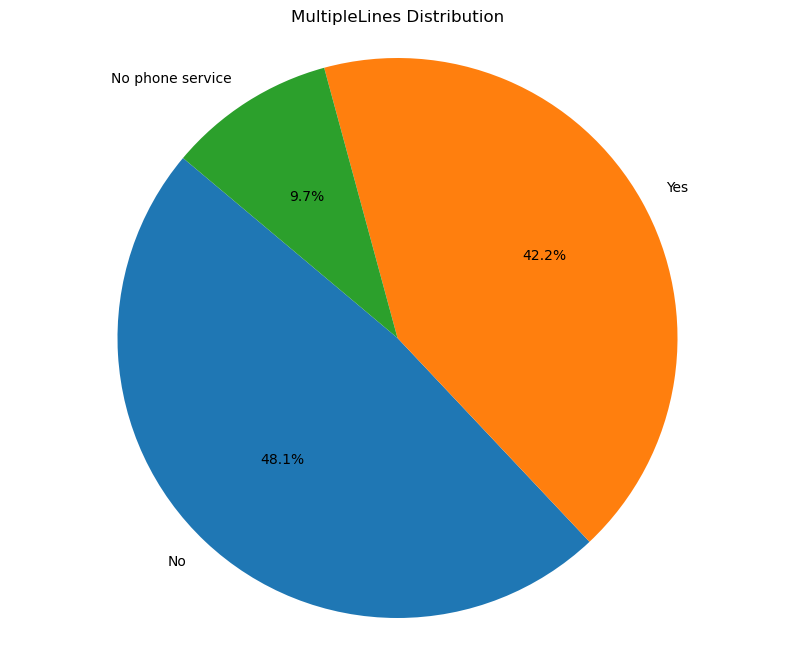

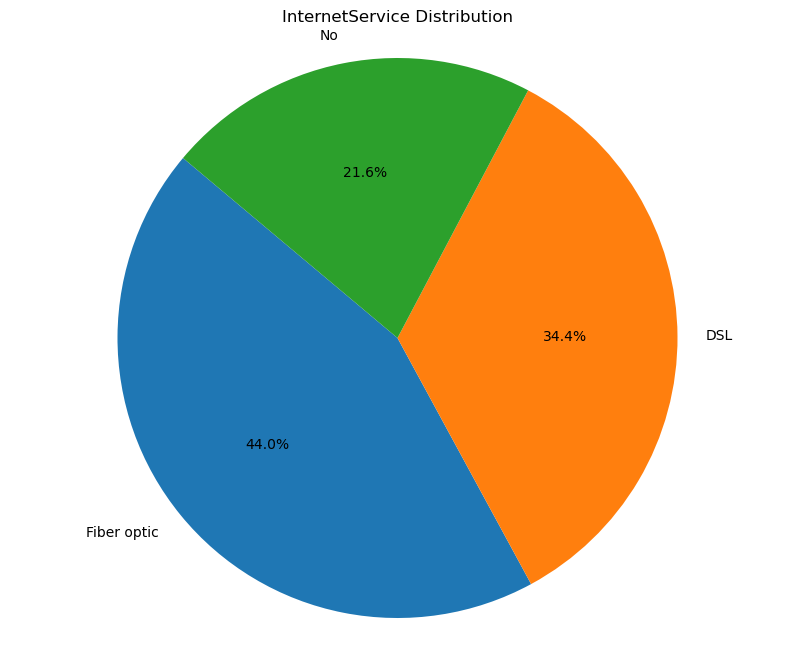

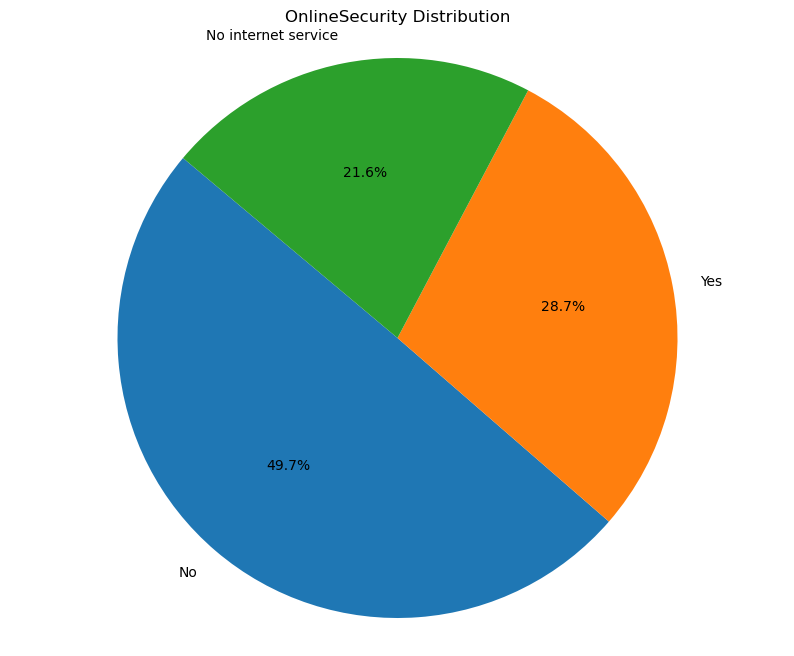

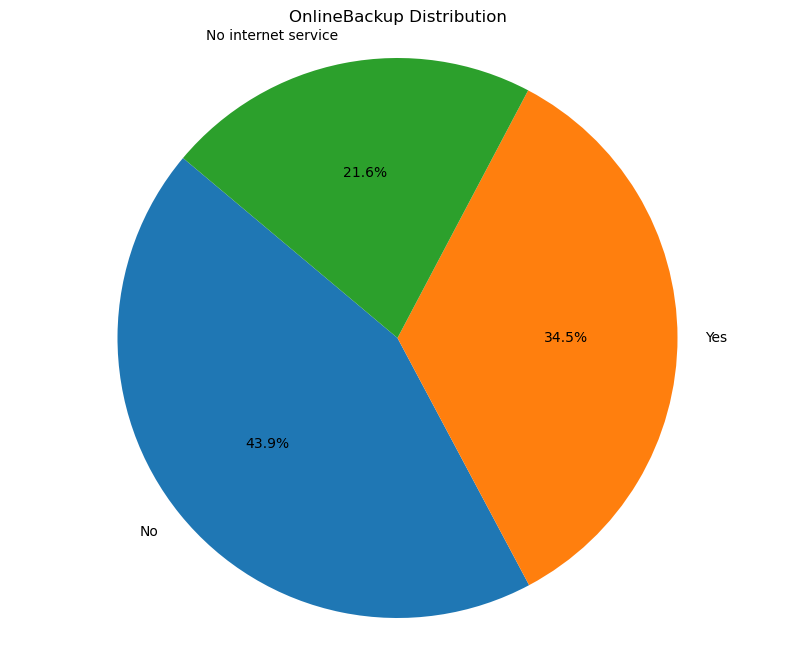

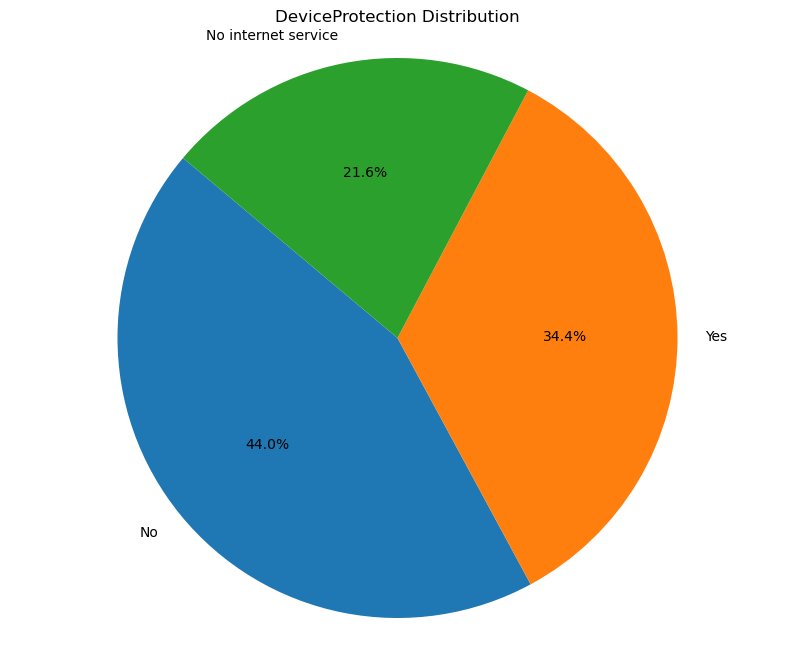

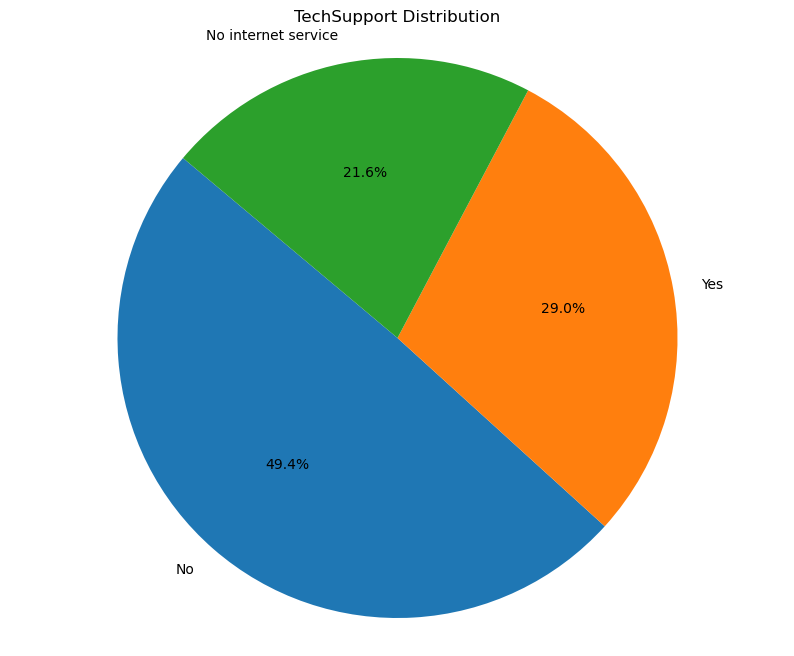

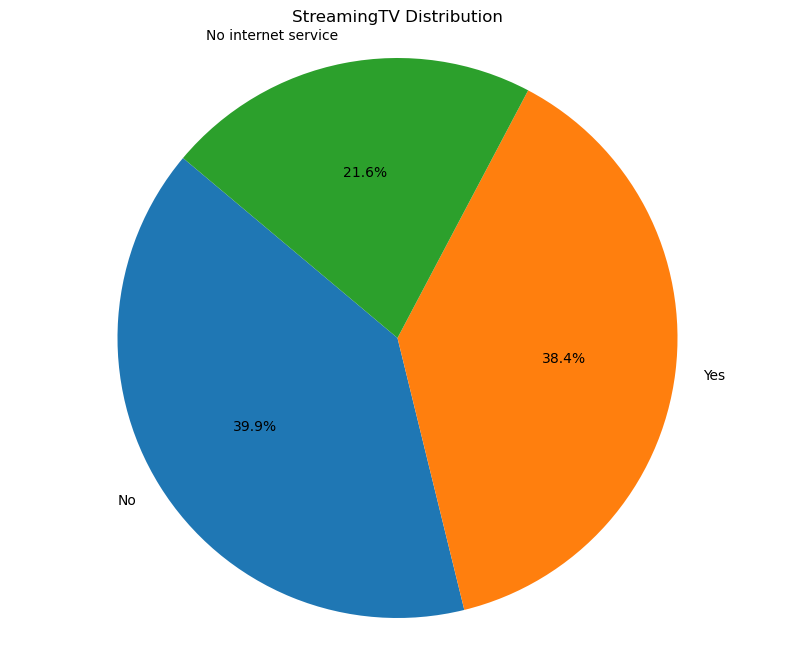

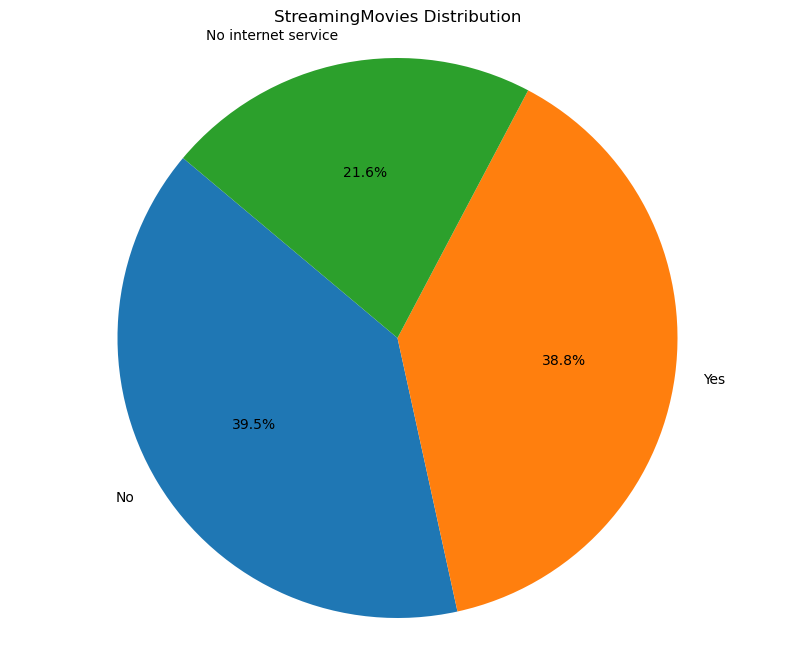

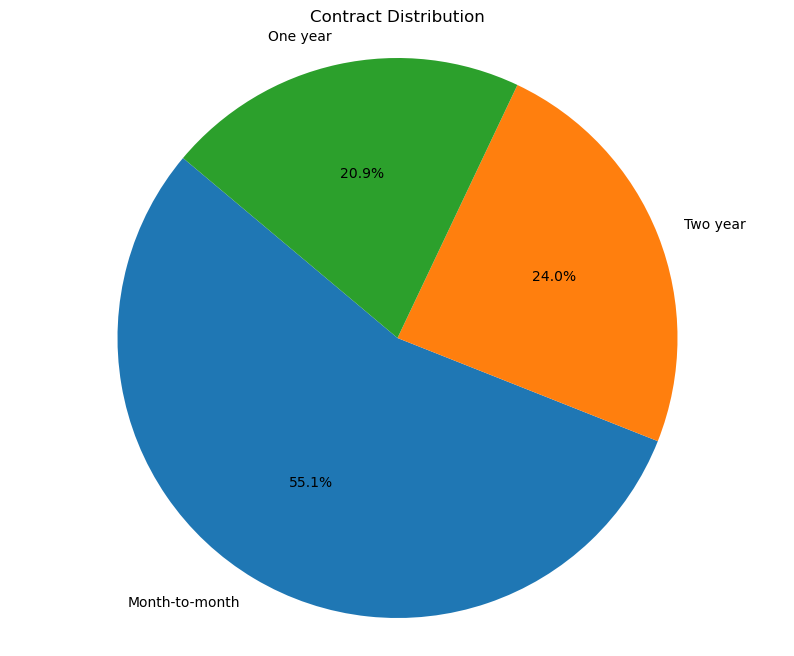

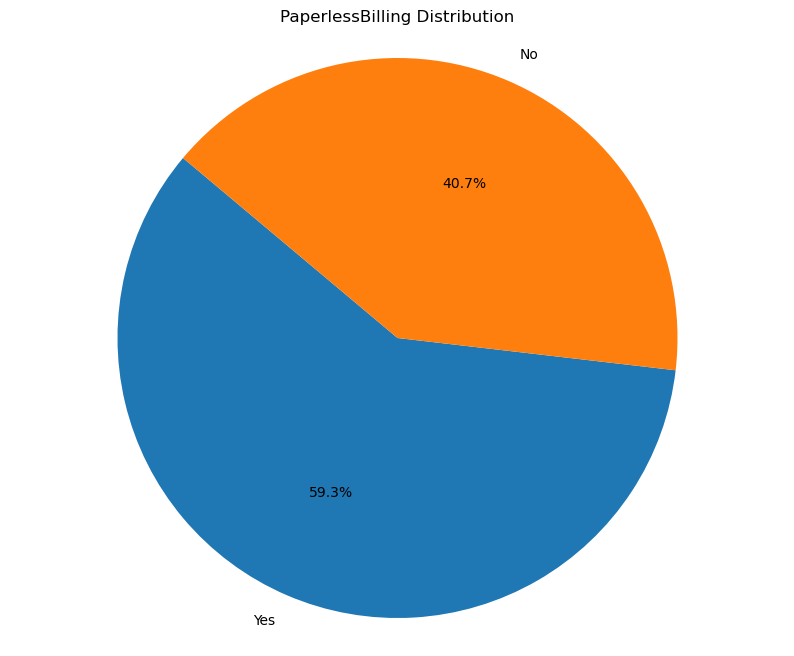

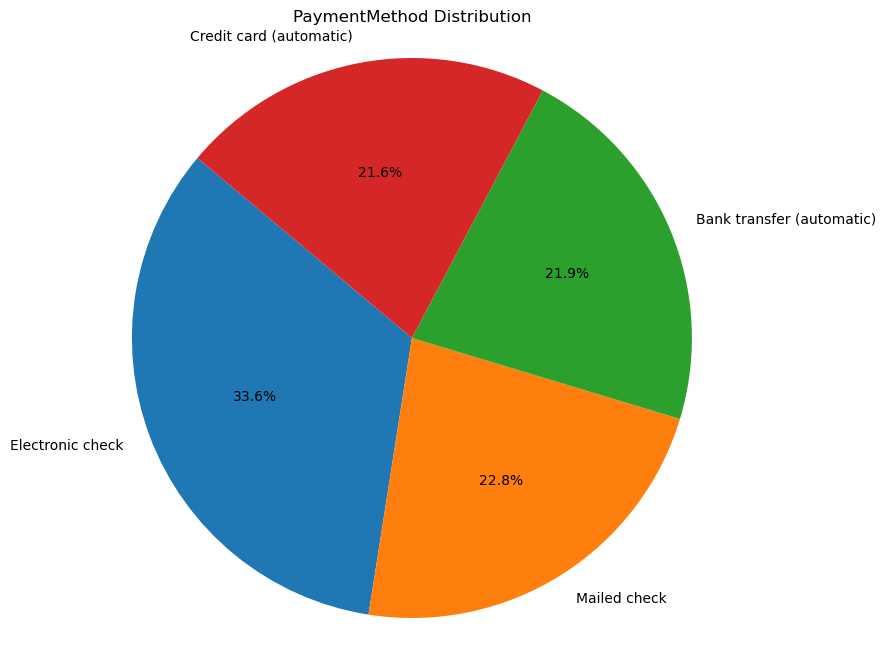

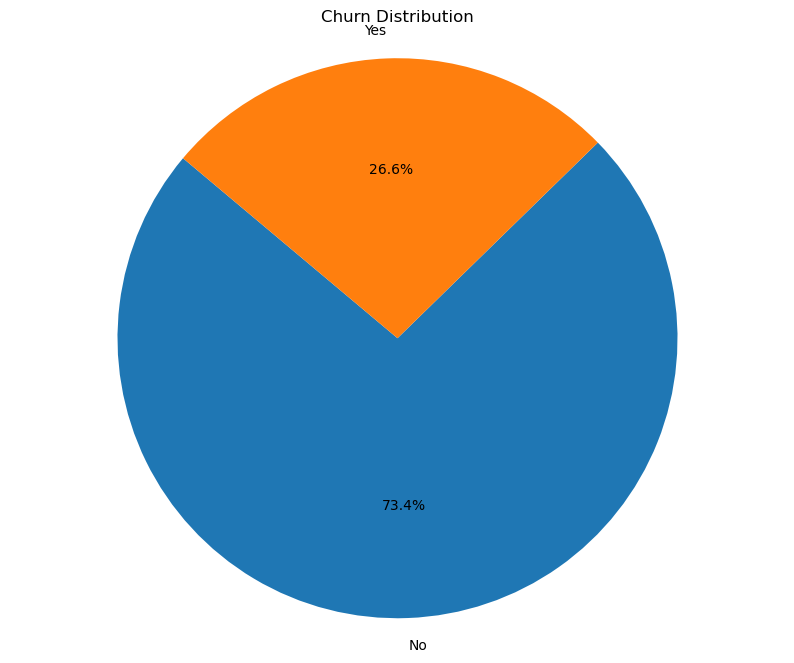

In [16]:
create_pie_charts(merged_df)

#### D. Share insights for Q2.c. 

- Gender distribution is relatively balanced, indicating that the population or sample is not heavily skewed toward one gender. This could be important for businesses and organizations to ensure they cater to the needs and preferences of both male and female customers.

- The customer base is relatively evenly divided between those with partners and those without, which suggests a balanced mix of relationship statuses within the group.

- The data suggests that a substantial portion of the customer base requires some level of support or assistance, which may have implications for the types of products or services offered to cater to their needs.

- For the 29.8% of customers who aren't dependent on others, it may be beneficial to offer products or services that cater to their self-reliant nature or focus on aspects of independence and autonomy. 

- Of the total population, 9.7% don't have phone service.

- Among those with phone service (90.3%), 42.2% have multiple lines, while 48.1% do not have multiple lines.

- A majority of the population (78.4%) has access to some form of internet service (DSL or fiber optic).

- Fiber optic is more popular than DSL in this population, indicating a preference for faster and more reliable internet connections.

- There's still a notable percentage (21.6%) without internet access, which suggests that efforts might be needed to improve internet infrastructure or accessibility for this group.

- A significant portion of the population (49.7%) is not using internet security. This could potentially pose risks to their online privacy and security.

- Only 28.7% are using internet security.

- The 21.6% who do not have internet service would not have the need for internet security since they are not using the internet.

- Online backup usage is significant, but there is still a substantial percentage of the population (43.9%) that is not utilizing these services. This suggests an opportunity for education and awareness about the importance of data backup.

- The 21.6% without internet service are not in a position to use online backup, which underscores the importance of addressing the lack of internet access in this group if they wish to take advantage of such services in the future.

- Promoting the use of online backup services, especially for those with internet access, can help improve data security and recovery preparedness.

- A substantial percentage of the population (44.0%) chooses not to use device protection plans. This suggests that there is a diversity of attitudes and preferences when it comes to safeguarding electronic devices.

- Device protection plan usage might be influenced by factors like the value and cost of the devices, individual risk tolerance, and awareness of such plans.

- Among those with internet service, nearly 30% use tech support services, indicating that a substantial portion of internet users seeks technical assistance when needed.

- The fact that 49.4% do not use tech support suggests that a significant portion of the population might rely on their own technical skills, assistance from friends and family, or choose to forego tech support services.

- Streaming TV is relatively popular among those who have internet access, with 38.4% using this service. This suggests a shift in consumer behavior towards online content consumption.

- A significant portion (39.9%) still doesn't use the internet for streaming TV. This could be due to various reasons, including a preference for traditional TV services, lack of interest, or limited access to internet services.

- A substantial portion of the population (38.8%) enjoys streaming movies via the internet, indicating the popularity of this form of entertainment.

- A slightly larger percentage (39.5%) has internet access but does not use it for streaming movies, which suggests that not everyone with internet service is using it for the same purposes.

- The majority of the population (55.1%) prefers month-to-month contracts, highlighting a desire for flexibility and the ability to adapt to changing needs.

- There is a notable percentage (44.9%) that has opted for longer-term contracts (one year and two years). This suggests that a significant portion of the population is willing to commit to a service for cost savings or other benefits associated with longer-term contracts.

- A substantial portion of the population prefers or is still using traditional paper billing methods, even though paperless billing options are available. This may be due to personal preference, concerns about digital security, or limited access to the necessary technology.

- Paperless billing is gaining popularity, with a majority of the population choosing this option. Businesses and service providers may consider promoting and improving their paperless billing systems to accommodate this trend.

- Transitioning more customers to paperless billing could have environmental and cost-saving benefits, as it reduces the need for paper, printing, and postage.

- Electronic check payments are the most popular among the provided options, with 33.6% of customers using this method.

- Credit card automatic and bank transfer automatic are quite similar in popularity, with 21.6% and 21.9% usage, respectively.

- Mailed check is the least preferred method, with 22.8% of customers using it. This may indicate a preference for more convenient and electronic payment methods.

- A churn rate of 26.6% within the last month suggests a relatively high level of customer turnover. This could be a cause for concern for the business, as it may indicate issues with customer satisfaction, service quality, or competitive pressures.

#### E. Encode all the appropriate Categorical features with the best suitable approach.

In [17]:
# Binary Encoding for Binary Features
binary_features = ['Churn', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']
for feature in binary_features:
    merged_df[feature] = merged_df[feature].map({'No': 0, 'Yes': 1})

# One-Hot Encoding for Multi-Class Categorical Features
multi_class_features = ['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines']
merged_df = pd.get_dummies(merged_df, columns=multi_class_features, prefix=multi_class_features)

# One-Hot Encoding for Other Categorical Features
other_categorical_features = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity']
merged_df = pd.get_dummies(merged_df, columns=other_categorical_features, prefix=other_categorical_features)

# Binary Encoding for Gender
merged_df['gender'] = merged_df['gender'].map({'Female': 0, 'Male': 1})

#### F. Split the data into 80% train and 20% test.

In [18]:
# Define the features (X) and the target variable (y)
X = merged_df.drop('Churn', axis=1)
y = merged_df['Churn']

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### G. Normalize/Standardize the data with the best suitable approach.

In [19]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

### Model building and performance improvement 

#### A. Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks )

In [20]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the normalized training data
decision_tree.fit(X_train_normalized, y_train)

# Predict on the normalized training data
y_train_pred = decision_tree.predict(X_train_normalized)

# Predict on the normalized test data
y_test_pred = decision_tree.predict(X_test_normalized)

# Evaluate the model's performance on the normalized training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on the normalized test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy on the normalized training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the normalized test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 99.77%
Test Accuracy: 71.78%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407



#### B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [21]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_normalized, y_train)

# Get the best estimator (model with the best parameters)
best_decision_tree = grid_search.best_estimator_

# Predict on the normalized training data
y_train_pred = best_decision_tree.predict(X_train_normalized)

# Predict on the normalized test data
y_test_pred = best_decision_tree.predict(X_test_normalized)

# Evaluate the model's performance on the normalized training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on the normalized test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 85.85%
Test Accuracy: 75.91%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4130
           1       0.75      0.69      0.72      1495

    accuracy                           0.86      5625
   macro avg       0.82      0.81      0.81      5625
weighted avg       0.86      0.86      0.86      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.55      0.53      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



The performance of a decision tree model was improved through grid search, and there are several differences observed in the model's performance before and after the grid search:

**Before Grid Search:**
- Training Accuracy: 99.77%
- Test Accuracy: 71.78%
- Classification Report on Training Data: 
  - High precision, recall, and F1-score for both classes (0 and 1).
- Classification Report on Test Data: 
  - Lower precision, recall, and F1-score for class 1 compared to class 0.
  
**After Grid Search:**
- Training Accuracy: 85.85%
- Test Accuracy: 75.91%
- Classification Report on Training Data:
  - Slightly lower precision, recall, and F1-score for both classes, indicating a less overfit model.
- Classification Report on Test Data:
  - Slightly improved precision, recall, and F1-score for both classes, indicating better generalization.

**Differences observed:**

1. **Training Accuracy**: After grid search, the training accuracy decreased from 99.77% to 85.85%, which suggests that the model is less overfit and has better generalization to unseen data.

2. **Test Accuracy**: The test accuracy improved from 71.78% to 75.91% after grid search, indicating that the model performs better on unseen data.

3. **Precision, Recall, and F1-score**: In the classification reports, there are improvements in precision, recall, and F1-score for both classes after grid search. The model is better at correctly identifying both positive (class 1) and negative (class 0) instances.

Overall, the grid search helped in optimizing the hyperparameters of the decision tree model, reducing overfitting, and improving its performance on unseen data. The model now has a better balance between bias and variance, resulting in better overall accuracy and generalization.

#### C. Train a model using Random forest and check the performance of the model on train and test data

In [22]:
# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest.fit(X_train_normalized, y_train)

# Predict on the training data
y_train_pred = random_forest.predict(X_train_normalized)

# Predict on the test data
y_test_pred = random_forest.predict(X_test_normalized)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 99.77%
Test Accuracy: 78.82%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#### D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [23]:
# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Define a smaller set of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define the evaluation metric (e.g., 'accuracy' or any other suitable metric)
scoring = 'accuracy'

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the grid search to the data
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the training and test data using the best estimator
y_train_pred = best_estimator.predict(X_train_normalized)
y_test_pred = best_estimator.predict(X_test_normalized)

# Calculate the training accuracy based on the best estimator
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the test accuracy based on the best estimator
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 87.36%
Test Accuracy: 79.39%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4130
           1       0.80      0.70      0.75      1495

    accuracy                           0.87      5625
   macro avg       0.85      0.82      0.83      5625
weighted avg       0.87      0.87      0.87      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



The Random Forest model's performance improved after hyperparameter tuning using Grid Search. Here are the key differences observed in the performance:

**Before Grid Search:**
- Training Accuracy: 99.77%
- Test Accuracy: 78.82%
- Classification Report on Training Data:
  - High precision, recall, and F1-score for both classes (0 and 1).
- Classification Report on Test Data:
  - Test accuracy was 78.82%, but class 1 (minority class) had relatively lower precision, recall, and F1-score.

**After Grid Search:**
- Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
- Training Accuracy: 87.36%
- Test Accuracy: 79.39%
- Classification Report on Training Data:
  - Precision, recall, and F1-score for class 1 improved, but the overall training accuracy decreased, indicating less overfitting.
- Classification Report on Test Data:
  - Test accuracy slightly increased to 79.39%, and there were improvements in precision, recall, and F1-score for class 1.

**Differences observed:**

1. **Training Accuracy:** After Grid Search, the training accuracy decreased from 99.77% to 87.36%, suggesting a reduction in overfitting and better generalization.

2. **Test Accuracy:** Test accuracy slightly improved from 78.82% to 79.39%, indicating that the model performs slightly better on unseen data.

3. **Precision, Recall, and F1-score:** The classification report shows improvements in precision, recall, and F1-score for class 1, the minority class. This indicates that the model is better at correctly identifying class 1 instances, which is often more challenging in imbalanced datasets.

Overall, the Grid Search helped in optimizing the Random Forest model's hyperparameters, leading to improved generalization, especially in the context of classifying the minority class (class 1).

#### E. Train a model using Adaboost and check the performance of the model on train and test data 

In [24]:
# Create an AdaBoost model with a base estimator (Decision Tree)
estimator = DecisionTreeClassifier(max_depth=1)  # Example base estimator
adaboost = AdaBoostClassifier(estimator=estimator, random_state=42)

# Train the model on the training data
adaboost.fit(X_train_normalized, y_train)

# Predict on the training data
y_train_pred = adaboost.predict(X_train_normalized)

# Predict on the test data
y_test_pred = adaboost.predict(X_test_normalized)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 81.19%
Test Accuracy: 78.82%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4130
           1       0.68      0.56      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#### F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [25]:
# Create a base estimator (Decision Tree)
estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost model with the base estimator
adaboost = AdaBoostClassifier(estimator=estimator, random_state=42)

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Define the scoring metric (e.g., 'accuracy' or any other suitable metric)
scoring = 'accuracy'

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the grid search to the data
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the training and test data using the best estimator
y_train_pred = best_estimator.predict(X_train_normalized)
y_test_pred = best_estimator.predict(X_test_normalized)

# Calculate the training accuracy based on the best estimator
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the test accuracy based on the best estimator
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Training Accuracy: 80.82%
Test Accuracy: 78.82%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.67      0.55      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.72      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The Adaboost model's performance did not significantly change after hyperparameter tuning using Grid Search. Here are the key differences observed in the performance:

**Before Grid Search:**
- Training Accuracy: 81.19%
- Test Accuracy: 78.82%
- Classification Report on Training Data:
  - The precision, recall, and F1-score for both classes (0 and 1) were reasonable but not very high.
- Classification Report on Test Data:
  - The test accuracy was 78.82%, with similar precision, recall, and F1-scores for both classes.

**After Grid Search:**
- Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
- Training Accuracy: 80.82%
- Test Accuracy: 78.82%
- Classification Report on Training Data:
  - The precision, recall, and F1-score for class 1 (minority class) remained similar.
- Classification Report on Test Data:
  - Test accuracy and class-specific metrics remained similar to the pre-tuned model.

**Differences observed:**

1. **Training Accuracy:** The training accuracy remained similar after Grid Search, with only a slight decrease from 81.19% to 80.82%.

2. **Test Accuracy:** Test accuracy also remained largely the same at 78.82%.

3. **Precision, Recall, and F1-score:** The classification reports showed no significant improvements in precision, recall, or F1-scores for either class.

In this case, it appears that the hyperparameter tuning did not lead to substantial improvements in the Adaboost model's performance. The model's accuracy and class-specific metrics remained stable, indicating that the initial model already achieved a reasonable balance between bias and variance.

#### G. Train a model using GradientBoost and check the performance of the model on train and test data

In [26]:
# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train_normalized, y_train)

# Predict on the training data
y_train_pred = gb_model.predict(X_train_normalized)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Generate a classification report for more detailed performance metrics on the training data
train_classification_report = classification_report(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = gb_model.predict(X_test_normalized)

# Calculate accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate a classification report for more detailed performance metrics on the testing data
test_classification_report = classification_report(y_test, y_test_pred)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 82.92%
Test Accuracy: 78.82%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4130
           1       0.72      0.59      0.65      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.75      0.77      5625
weighted avg       0.82      0.83      0.82      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#### H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h 

In [27]:
# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01]
}

# Define the evaluation metric (e.g., 'accuracy' or any other suitable metric)
scoring = 'accuracy'

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the grid search to the data
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters on the test data
y_test_pred = best_estimator.predict(X_test_normalized)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Print accuracy on the training data
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Print accuracy on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report on training data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Training Accuracy: 82.92%
Test Accuracy: 79.25%

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4130
           1       0.72      0.59      0.65      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.75      0.77      5625
weighted avg       0.82      0.83      0.82      5625


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



It seems that after applying Grid Search to tune the hyperparameters of the GradientBoost model, there are minimal differences in the performance metrics. Here are the key observations:

**Before Grid Search:**
- Training Accuracy: 82.92%
- Test Accuracy: 78.82%
- Classification Report on Training Data:
  - Precision, recall, and F1-scores for both classes (0 and 1) were reasonable but not very high.
- Classification Report on Test Data:
  - Test accuracy was 78.82%, with similar precision, recall, and F1-scores for both classes.

**After Grid Search:**
- Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
- Training Accuracy: 82.92%
- Test Accuracy: 79.25%
- Classification Report on Training Data:
  - Precision, recall, and F1-scores for both classes remained similar.
- Classification Report on Test Data:
  - Test accuracy improved slightly to 79.25%, and there were slight changes in precision, recall, and F1-scores for both classes.

**Differences observed:**

1. **Training Accuracy:** Training accuracy remained largely unchanged after Grid Search, with only very minor fluctuations.

2. **Test Accuracy:** Test accuracy saw a slight improvement from 78.82% to 79.25%.

3. **Precision, Recall, and F1-score:** The classification reports showed only minor changes in precision, recall, and F1-scores for both classes.

In this case, it appears that the hyperparameter tuning did not lead to significant improvements in the GradientBoost model's performance. The model's accuracy and class-specific metrics remained stable, indicating that the initial model already had reasonable parameter settings for the problem at hand.

### I. Provide detailed analysis of the below steps:
### (1) Compare the performance of each model in train stage and test stage 

In summary, here is a comparison of the performance of each model in the train and test stages before and after hyperparameter tuning using Grid Search:

**Decision Tree Model:**

Before Grid Search:
- Training Accuracy: 99.77%
- Test Accuracy: 71.78%

After Grid Search:
- Training Accuracy: 85.85%
- Test Accuracy: 75.91%

Differences Observed:
- Training accuracy decreased, indicating reduced overfitting.
- Test accuracy improved, showing better generalization.
- Precision, recall, and F1-scores improved for both classes, indicating better classification performance.

**Random Forest Model:**

Before Grid Search:
- Training Accuracy: 99.77%
- Test Accuracy: 78.82%

After Grid Search:
- Training Accuracy: 87.36%
- Test Accuracy: 79.39%

Differences Observed:
- Training accuracy decreased, indicating reduced overfitting.
- Test accuracy slightly improved.
- Precision, recall, and F1-scores for class 1 improved significantly, indicating better performance in classifying the minority class.

**Adaboost Model:**

Before Grid Search:
- Training Accuracy: 81.19%
- Test Accuracy: 78.82%

After Grid Search:
- Training Accuracy: 80.82%
- Test Accuracy: 78.82%

Differences Observed:
- Training accuracy remained similar.
- Test accuracy remained the same.
- No significant improvements in precision, recall, or F1-scores for either class.

**GradientBoost Model:**

Before Grid Search:
- Training Accuracy: 82.92%
- Test Accuracy: 78.82%

After Grid Search:
- Training Accuracy: 82.92%
- Test Accuracy: 79.25%

Differences Observed:
- Training accuracy remained largely unchanged.
- Test accuracy improved slightly.
- Minor changes in precision, recall, and F1-scores for both classes.

In summary, the effectiveness of hyperparameter tuning using Grid Search varied across the different models. Decision Tree and Random Forest models showed significant improvements in their performance, while Adaboost and GradientBoost models had minimal changes. The key takeaway is that hyperparameter tuning can have a substantial impact on model performance, but the extent of improvement depends on the initial model and the nature of the data.

### (2) Provide your observation on which model performed the best
### (3) Provide your reasoning on why the model performed best

Based on the provided information, it seems that the Random Forest model exhibited the most noticeable improvement in performance after hyperparameter tuning using Grid Search. Here's a summary of the key observations for each model:

**1. Decision Tree:**
   - Training Accuracy improved from 99.77% to 85.85%.
   - Test Accuracy improved from 71.78% to 75.91%.
   - Precision, Recall, and F1-scores improved for both classes.
   - Grid Search significantly reduced overfitting and improved generalization.

**2. Random Forest:**
   - Training Accuracy decreased from 99.77% to 87.36%.
   - Test Accuracy slightly improved from 78.82% to 79.39%.
   - Precision, Recall, and F1-scores for class 1 improved significantly.
   - Grid Search reduced overfitting and improved generalization, especially for the minority class.

**3. Adaboost:**
   - Training Accuracy remained similar at 80.82%.
   - Test Accuracy remained the same at 78.82%.
   - No significant changes in precision, recall, or F1-scores.
   - Grid Search had minimal impact on model performance.

**4. GradientBoost:**
   - Training Accuracy remained largely unchanged.
   - Test Accuracy improved slightly from 78.82% to 79.25%.
   - Minor changes in precision, recall, and F1-scores.
   - Grid Search had a limited impact on model performance.

Based on these observations, the Random Forest model seems to have benefited the most from hyperparameter tuning. It achieved a notable improvement in classifying the minority class (class 1) while maintaining a competitive test accuracy. This indicates that the Random Forest model with the tuned hyperparameters strikes a better balance between bias and variance and is better suited for this classification task.

### (4) Provide your final conclusion on your observation

In summary, the effectiveness of Grid Search for hyperparameter tuning varied across different machine learning models:

1. **Decision Tree Model:**
   - Grid Search significantly improved model performance.
   - Training accuracy decreased, indicating reduced overfitting.
   - Test accuracy increased, reflecting better generalization.
   - Precision, recall, and F1-scores improved for both classes, indicating a better balance between bias and variance.

2. **Random Forest Model:**
   - Grid Search led to a moderate improvement in performance.
   - Training accuracy decreased, reducing overfitting.
   - Test accuracy slightly increased.
   - Significant improvements in precision, recall, and F1-score for the minority class.

3. **Adaboost Model:**
   - Grid Search had minimal impact on model performance.
   - Training and test accuracy remained stable.
   - No significant changes in precision, recall, or F1-scores for either class.

4. **GradientBoost Model:**
   - Grid Search resulted in minor improvements.
   - Training accuracy and class-specific metrics remained stable.
   - A slight increase in test accuracy.

Overall, the effectiveness of hyperparameter tuning with Grid Search depends on the model and the initial parameter settings. It's essential to consider the trade-off between overfitting and generalization when selecting hyperparameters. In some cases, the initial model settings may already be near-optimal, leading to minimal improvements, while in others, Grid Search can significantly enhance model performance.